# 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows

In [ ]:
from pydataset import data
df_iris = data('iris')
df_iris
df_iris.head(3)

- print the number of rows and columns (shape)

In [ ]:
df_iris.shape

- print the column names

In [ ]:
for col in df_iris.columns:
    print(col)

In [ ]:
df_iris.dtypes

- print the data type of each column

In [ ]:
df_iris.dtypes

In [ ]:
df_iris.info()

- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
df_iris.describe()

# 5. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

- assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1AUpCIpuh_XOMfHEDBolzle3CPqPUtZtUxT57GYTkB9w/edit#gid=1023018493'    
# Please make sure you make the url sharable to everyone
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_excel = pd.read_csv(csv_export_url)
df_excel_sample = df_excel.head(100)
df_excel_sample

- print the number of rows of your original dataframe

In [ ]:
df_excel.shape[0]

- print the first 5 column names

In [ ]:
df_excel.iloc[0:0 , :5]

In [ ]:
df_excel.columns[:5]

- print the column names that have a data type of object

In [ ]:
df_excel.info()

In [ ]:
list(df_excel.select_dtypes(['object']).columns)

In [ ]:
df_excel.dtypes[df_excel.dtypes == object]

- compute the range for each of the numeric variables.

In [ ]:
df_excel.is_senior_citizen.max()- df_excel.is_senior_citizen.min()

In [ ]:
df_excel.phone_service.max()- df_excel.phone_service.min()

In [ ]:
df_excel.internet_service.max()- df_excel.internet_service.min()

In [ ]:
df_excel.contract_type.max()- df_excel.contract_type.min()

In [ ]:
df_excel.monthly_charges.max() - df_excel.monthly_charges.min()

In [ ]:
df_excel.total_charges.max() - df_excel.total_charges.min()

In [ ]:
df_excel[df_excel.columns[(df_excel.dtypes == float) | (df_excel.dtypes == int)]].max() - df_excel[df_excel.columns[(df_excel.dtypes == float) | (df_excel.dtypes == int)]].min()

In [ ]:
df_excel.describe()

In [ ]:
# I can select just the true numeric variables to declutter my results.

telco_stats = df_excel[['monthly_charges', 'total_charges']].describe().T
telco_stats


In [ ]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

# 6. Read the data from this google sheet into a dataframe, df_google

In [ ]:


import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    
# This is url localtion for google sheet. Please make sure you make the url sharable to everyone

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
# export url and pull it here

df_google = pd.read_csv(csv_export_url)

df_google


- print the first 3 rows

In [ ]:
df_google.head(3)

- print the number of rows and columns

In [ ]:
df_google.shape

- print the column names

In [ ]:
df_google.columns.to_list()

- print the data type of each column

In [ ]:
df_google.dtypes

- print the summary statistics for each of the numeric variables

In [ ]:
df_google.describe().T

- print the unique values for each of your categorical variables

In [ ]:
# I could get a count of unique values for each variable with an object data type.

for col in df_google.columns:
#     print(col)
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

In [ ]:
df_google.Survived.value_counts(dropna=False)

In [ ]:
df_google.Pclass.value_counts(dropna=False)

In [ ]:
df_google.Sex.value_counts(dropna=False)

In [ ]:
df_google.Embarked.value_counts(dropna=False)

# Exercises

# The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

# This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.


# Using the Iris Data:

# 1. Use the function defined in acquire.py to load the iris data.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

from pydataset import data
import matplotlib.pyplot as plt

import os


In [4]:

df_iris = acquire.get_iris_data()
df_iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


# 2. Drop the species_id and measurement_id columns.

In [5]:
df_iris = df_iris.drop(columns = ['species_id']) # There is no measurement_id columns


In [6]:
df_iris.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


# 3. Rename the species_name column to just species.

In [7]:
df_iris = df_iris.rename(columns = {'species_name':'species'})
df_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


# 4. Create dummy variables of the species name and concatenate onto the iris dataframe.

In [8]:
df_iris_dummies =  pd.get_dummies(df_iris[['species']])
df_iris_dummies.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [9]:
df_iris = pd.concat([df_iris, df_iris_dummies], axis=1)
df_iris = df_iris.drop(columns = ['species'])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


# 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [10]:
def prep_iris(df_iris):
    # drop and rename columns
    df_iris = df_iris.drop(columns = 'species_id').rename(columns = {'species_name':'species'})
    
    # Create dummy columns for species
    species_dummies = pd.get_dummies(df_iris.species)
    
    # add dummy columns to df_iris
    df_iris = pd.concat([df_iris, df_iris_dummies], axis=1)
    
    return df_iris
    

# Using the Titanic dataset

# 1. Use the function defined in acquire.py to load the Titanic data.

In [12]:
df_titanic = acquire.get_titanic_data()
# viewing first 5 rows
df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [17]:
# Rows and Columns
df_titanic.shape

(891, 13)

In [18]:
# Getting information about the dataframe
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [20]:
# Getting summary statistics from numeric columns
df_titanic.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

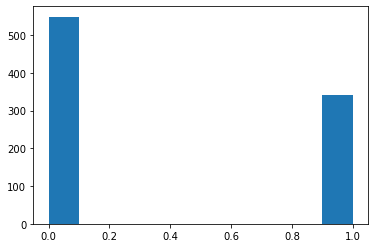

In [23]:
# Checking out distributions of numeric columns
plt.hist(df_titanic['survived'])

In [26]:
num_cols = df_titanic.columns[[df_titanic[col].dtype == 'int64' for col in df_titanic.columns]]
num_cols

Index(['passenger_id', 'survived', 'pclass', 'sibsp', 'parch', 'alone'], dtype='object')

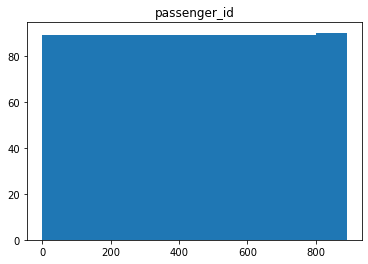

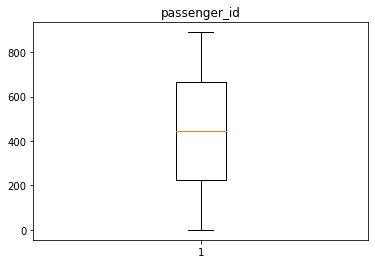

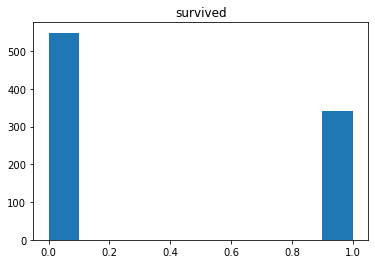

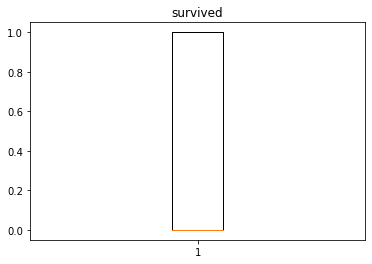

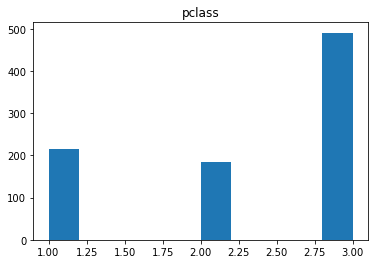

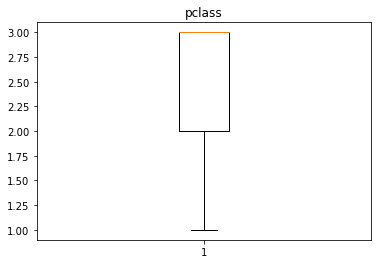

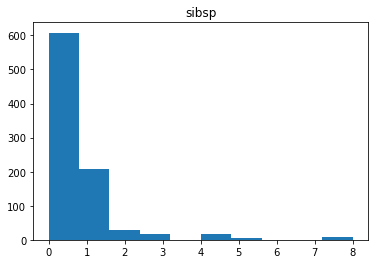

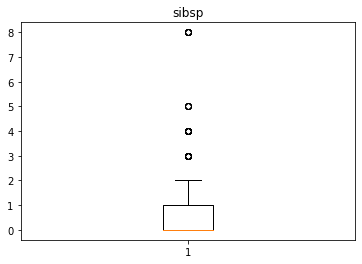

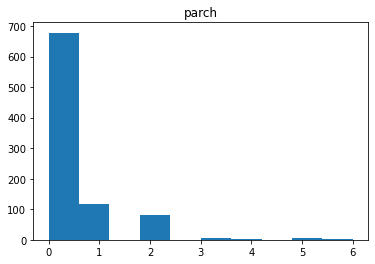

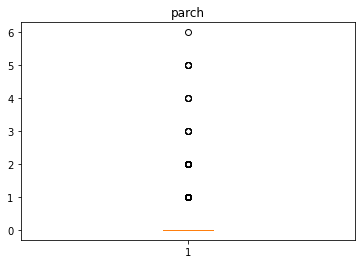

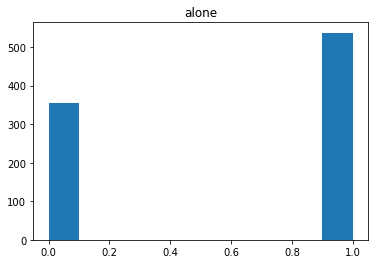

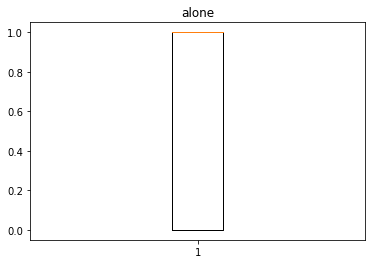

In [28]:
for col in num_cols:
    plt.hist(df_titanic[col])
    plt.title(col)
    plt.show()
    plt.boxplot(df_titanic[col])
    plt.title(col)
    plt.show()

In [30]:
# Use .describe with object columns
obj_cols = df_titanic.columns[[df_titanic[col].dtype == 'O' for col in df_titanic.columns]]
obj_cols

Index(['sex', 'embarked', 'class', 'deck', 'embark_town'], dtype='object')

In [31]:
for col in obj_cols:
    print(df_titanic[col].value_counts())
    print(df_titanic[col].value_counts(normalize = True, dropna = False))
    print('------------------------------')

male      577
female    314
Name: sex, dtype: int64
male      0.647587
female    0.352413
Name: sex, dtype: float64
------------------------------
S    644
C    168
Q     77
Name: embarked, dtype: int64
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
------------------------------
Third     491
First     216
Second    184
Name: class, dtype: int64
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
------------------------------
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
------------------------------
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64
-

In [32]:
# Create bins for fare using .value_counts.
# Using sort = false will sort by bin values as opposed to the frequency counts.
df_titanic.fare.value_counts(bins = 5, sort = False)

(-0.513, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(307.398, 409.863]      0
(409.863, 512.329]      3
Name: fare, dtype: int64

In [33]:
# Find columns with missing values and the total of missing values.
missing = df_titanic.isnull().sum()
missing[missing >0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

# Step 2: Cleaning Data

# 2. Drop any unnecessary, unhelpful, or duplicated columns.

In [34]:
# Drop duplicates... run just in case; reassign and check the shape of my data
print(df_titanic.shape)
df_titanic = df_titanic.drop_duplicates()
print(df_titanic.shape)

(891, 13)
(891, 13)


### Missing Data?

In [35]:
# Drop columns with too many missing values for now and reassign; check the shape of my data.
cols_to_drop = ['deck', 'embarked', 'class', 'age']
df_titanic = df_titanic.drop(columns=cols_to_drop)
df_titanic.shape

(891, 9)

In [36]:
# Validate that the columns are dropped.
df_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


We could fill embark_town with most common value, 'Southampton', by hard-coding the value using the fillna() function, as below. Or we could use an imputer. We will demonstrate the imputer after the train-validate-test split.

In [38]:
# Run .fillna() on the entire df_titanic.
df_titanic['embark_town'] = df_titanic.embark_town.fillna(value='Southampton')

In [39]:
# Validate that missing values in embark_town have been handled.
df_titanic.embark_town.isna().sum()

0

### Outliers?
There are a few outliers potentially in sibsp, parch, but without specific domain knowledge related to the titanic, I am not going to remove those outliers or snap them/compress them, I will ignore them for now.

Erroneous Values?
No erroneous values detected.

### Correct Datatypes?

In [41]:
df_titanic.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
sibsp             int64
parch             int64
fare            float64
embark_town      object
alone             int64
dtype: object

### Text Normalization?
No text normalization issues detected.


### Tidy Data?

In [43]:
# Each column should only represent one variable
# Each row should be one observation (passenger)
df_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


### Create New Variables?

Get dummy vars for sex and embark_town

dummy_na: create a dummy var for na values, also? drop_first: drop first dummy var (since we know if they do not belong to any of the vars listed, then they must belong to the first one that is not listed).

In [45]:
dummy_df_titanic = pd.get_dummies(df_titanic[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
dummy_df_titanic

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [48]:
# Concatenate the dummy_df dataframe above with the original df and validate.
df_titanic = pd.concat([df_titanic, dummy_df_titanic], axis=1)
df_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


### Rename Columns?
No renaming needed at this time.

### Scaling Data?

In [49]:
# You want to scale data when you're using methods based on measures
# of how far apart data points, like support vector machines
# or k-nearest neighbors.

### Lets not do that all over again repeatedly...lets make a function

In [51]:
def clean_data(df):
    '''
    This function will clean the data...
    '''
    df = df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    df = df.drop(columns=cols_to_drop)
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df

### Testing that the function does what we intend for it to do:

In [53]:
df_titanic = acquire.get_titanic_data()
df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [55]:
df_titanic = clean_data(df_titanic)
df_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [56]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   sex                      891 non-null    object 
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   embark_town              891 non-null    object 
 8   alone                    891 non-null    int64  
 9   sex_male                 891 non-null    uint8  
 10  embark_town_Queenstown   891 non-null    uint8  
 11  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 72.2+ KB


# Step 3: Splitting

In [60]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 
train, test = train_test_split(df_titanic, test_size = .2, random_state=123, stratify=df_titanic.survived)

In [61]:
print(train.shape)
print(test.shape)

(712, 12)
(179, 12)


In [62]:
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [63]:
# Observe split
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (498, 12)
Validate: (214, 12)
Test: (179, 12)


# Turn it into a function

In [64]:
def split_data(df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
    return train, validate, test

### Testing that the function is doing what we intend for it to do:

In [65]:
df_titanic.shape

(891, 12)

In [68]:
train, validate, test = split_data(df)
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (498, 12)
Validate: (214, 12)
Test: (179, 12)


### Alternative Method: Impute

We can impute values using the mean, median, mode (most frequent), or a constant value. We will use sklearn.imputer.SimpleImputer to do this.

Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent').
Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object.
Transform train: fill missing values in train dataset with the stored value
Transform validate: fill missing values in validate dataset with the stored value
Transform test: fill missing values in test dataset with the stored value

In [69]:
# Get fresh Titanic data to use with missing values in embark_town again.
df = acquire.get_titanic_data()
train, validate, test = split_data(df)

In [70]:
# ONLY look at train dataset after we split our data.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  498 non-null    int64  
 1   survived      498 non-null    int64  
 2   pclass        498 non-null    int64  
 3   sex           498 non-null    object 
 4   age           401 non-null    float64
 5   sibsp         498 non-null    int64  
 6   parch         498 non-null    int64  
 7   fare          498 non-null    float64
 8   embarked      497 non-null    object 
 9   class         498 non-null    object 
 10  deck          106 non-null    object 
 11  embark_town   497 non-null    object 
 12  alone         498 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 54.5+ KB


Create the SimpleImputer object, which we will store in the variable imputer. In the creation of the object, we will specify the strategy to use (mean, median, most_frequent). Essentially, this is creating the instructions and assigning them to a variable, imputer.

In [71]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

Fit the imputer to the columns in the training df. This means that the imputer will determine the most_frequent value, or other value depending on the strategy called, for each column.

In [72]:
imputer = imputer.fit(train[['embark_town']])

It will store that value in the imputer object to use upon calling transform. We will call transform on our train, validate, and test datasets to fill any missing values

In [73]:
train[['embark_town']] = imputer.transform(train[['embark_town']])

validate[['embark_town']] = imputer.transform(validate[['embark_town']])

test[['embark_town']] = imputer.transform(test[['embark_town']])

In [74]:
# Validate that there are no longer any Null values in embark_town.
print(train.embark_town.value_counts(dropna=False))
print(validate.embark_town.value_counts(dropna=False))
print(test.embark_town.value_counts(dropna=False))

Southampton    355
Cherbourg      102
Queenstown      41
Name: embark_town, dtype: int64
Southampton    160
Cherbourg       38
Queenstown      16
Name: embark_town, dtype: int64
Southampton    131
Cherbourg       28
Queenstown      20
Name: embark_town, dtype: int64


### Simplify our life with a function

Note: the clean_data() function is already dealing with missing values. If we want to use imputation, we will need to go back and tweak our earlier function.

In [75]:
# Yay functions!
def impute_mode(train, validate, test):
    '''
    Takes in train, validate, and test, and uses train to identify the best value to replace nulls in embark_town
    Imputes that value into all three sets and returns all three sets
    '''
    imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
    train[['embark_town']] = imputer.fit_transform(train[['embark_town']])
    validate[['embark_town']] = imputer.transform(validate[['embark_town']])
    test[['embark_town']] = imputer.transform(test[['embark_town']])
    return train, validate, test

### We can create a function made of our other functions

In [76]:
# Another function? YES PLZ!
def prep_titanic_data(df):
    '''
    The ultimate dishwasher
    '''
    df = clean_data(df)
    train, validate, test = split_data(df)
    return train, validate, test

In [77]:
# Acquire fresh Titanic data to test my funtion.
df_titanic = acquire.get_titanic_data()

In [78]:
# Run final prepare function and validate what that the function is working properly.
train, validate, test = prep_titanic_data(df)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             498 non-null    int64  
 1   survived                 498 non-null    int64  
 2   pclass                   498 non-null    int64  
 3   sex                      498 non-null    object 
 4   sibsp                    498 non-null    int64  
 5   parch                    498 non-null    int64  
 6   fare                     498 non-null    float64
 7   embark_town              498 non-null    object 
 8   alone                    498 non-null    int64  
 9   sex_male                 498 non-null    uint8  
 10  embark_town_Queenstown   498 non-null    uint8  
 11  embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 40.4+ KB


# 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

# 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

# Using the Telco dataset

# 1. Use the function defined in acquire.py to load the Telco data.

In [14]:
df_telco = acquire.new_telco_data()
df_telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


# 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

# 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

# 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

# Exploratory Analysis:

# Exercises

# Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

# 1. Acquire, prepare & split your data.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)

In [2]:
# Acquiring iris_db from mySQL Server
import env
import acquire
df = acquire.get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [3]:
# Usefull helper for checking for nulls
# What proportion of each column is empty
df.isna().mean()

species_id      0.0
species_name    0.0
sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
dtype: float64

In [4]:
# droping measurement_id column
def prep_iris(df):
    'dropping species_id'
    df = df.drop(columns = ['species_id'])
    return df

In [5]:
df = prep_iris(df)
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [6]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [8]:
train, validate, test = train_validate_test_split(df, target='species_name')
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

# 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

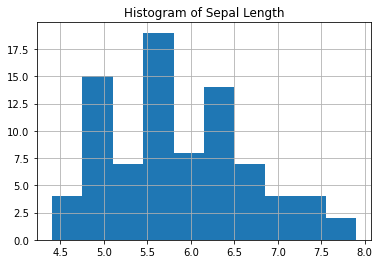

In [10]:
plt.title("Histogram of Sepal Length")
train.sepal_length.hist()
plt.show()

<AxesSubplot:>

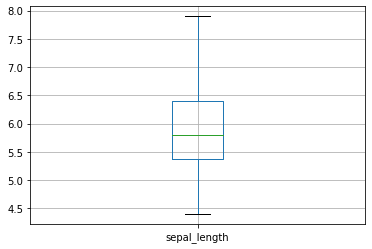

In [14]:
train.boxplot(column = ['sepal_length'])

In [18]:
train.sepal_length.describe()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

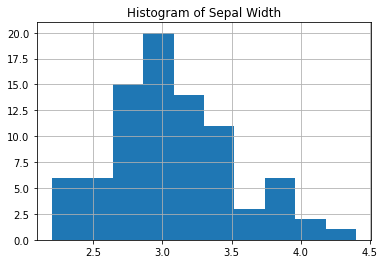

In [16]:
plt.title("Histogram of Sepal Width")
train.sepal_width.hist()
plt.show()

<AxesSubplot:>

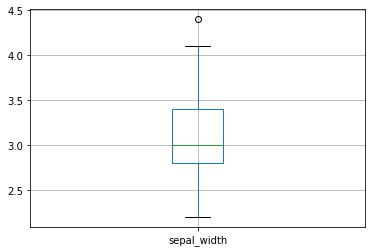

In [17]:
train.boxplot(column = ['sepal_width'])

In [19]:
train.sepal_width.describe()

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

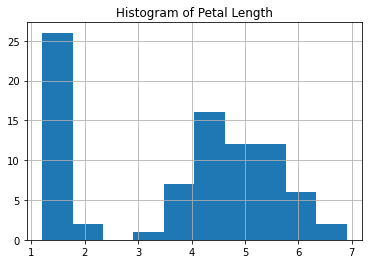

In [20]:
plt.title("Histogram of Petal Length")
train.petal_length.hist()
plt.show()

<AxesSubplot:>

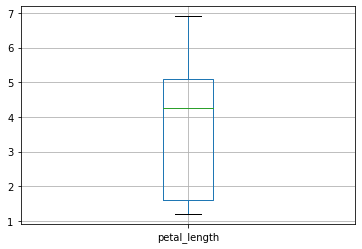

In [22]:
train.boxplot(column = ['petal_length'])

In [23]:
train.petal_length.describe()

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

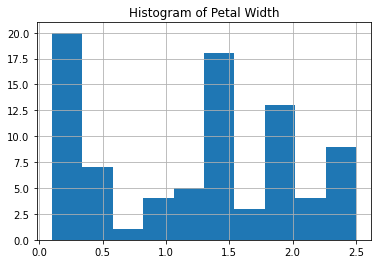

In [26]:
plt.title("Histogram of Petal Width")
train.petal_width.hist()
plt.show()

<AxesSubplot:>

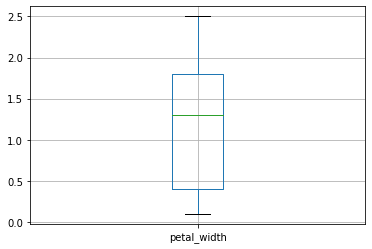

In [28]:
train.boxplot(column = ['petal_width'])

In [29]:
train.petal_width.describe()

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [33]:
train.species_name.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species_name, dtype: int64

<AxesSubplot:>

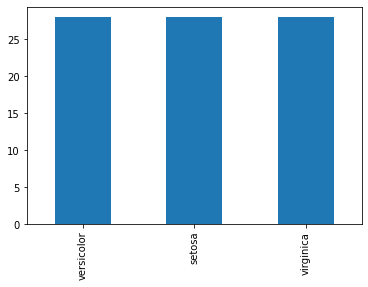

In [34]:
train.species_name.value_counts().plot.bar()

- Document takeaways & any actions.

# 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [39]:
train.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
79,versicolor,5.7,2.6,3.5,1.0
36,setosa,5.5,3.5,1.3,0.2
133,virginica,6.3,2.8,5.1,1.5
95,versicolor,5.7,3.0,4.2,1.2
18,setosa,5.7,3.8,1.7,0.3


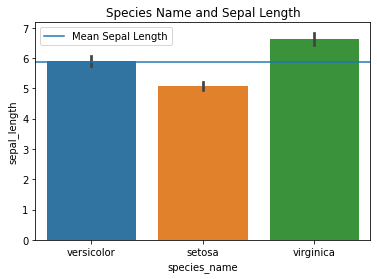

In [42]:
plt.title("Species Name and Sepal Length")
sns.barplot(x="species_name", y="sepal_length", data=train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean Sepal Length")
plt.legend()
plt.show()

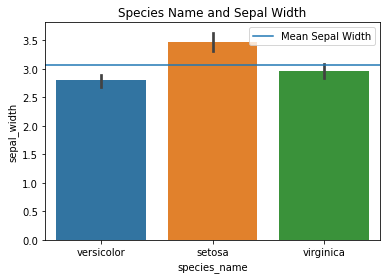

In [43]:
plt.title("Species Name and Sepal Width")
sns.barplot(x="species_name", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean Sepal Width")
plt.legend()
plt.show()

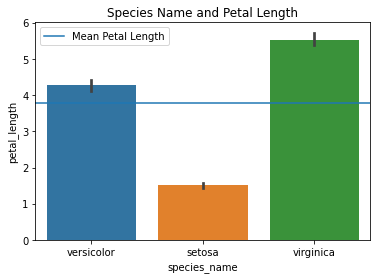

In [45]:
plt.title("Species Name and Petal Length")
sns.barplot(x="species_name", y="petal_length", data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean Petal Length")
plt.legend()
plt.show()

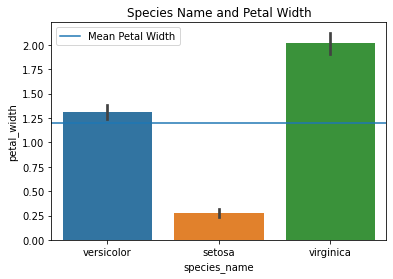

In [77]:
plt.title("Species Name and Petal Width")
sns.barplot(x="species_name", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean Petal Width")
plt.legend()
plt.show()

- For each measurement type, compute the descriptive statistics for each species.

In [65]:
versicolor = train[train.species_name == 'versicolor']
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


In [66]:
setosa = train[train.species_name == 'setosa']
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


In [67]:
virginica = train[train.species_name == 'virginica']
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [72]:
from scipy import stats

null_hypothesis = "Mean petal_width of Virginica is less or equal to mean petal width of Versicolor"

alternative_hypothesis = "Mean petal_width of Virginica is more than mean petal width of Versicolor"

# Use Mann Whitney u-test when t-test assumptions do not hold.
# The distributions are not normal and the variances are not equal, so we'll do mann-whitney
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width)
t, p

(767.0, 6.47119166980993e-10)

In [76]:
alpha = 0.05
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence to move forward with the understanding that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that Mean petal_width of Virginica is less or equal to mean petal width of Versicolor
We find evidence to move forward with the understanding that Mean petal_width of Virginica is more than mean petal width of Versicolor


In [79]:
from scipy import stats

null_hypothesis = "Mean petal_length of Virginica is less or equal to mean petal_length of Versicolor"

alternative_hypothesis = "Mean petal_length of Virginica is more than mean petal_length of Versicolor"

# Use Mann Whitney u-test when t-test assumptions do not hold.
# The distributions are not normal and the variances are not equal, so we'll do mann-whitney
t, p = stats.mannwhitneyu(virginica.petal_length, versicolor.petal_length)
t, p

(776.5, 2.9479835715150625e-10)

In [80]:
alpha = 0.05
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence to move forward with the understanding that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that Mean petal_length of Virginica is less or equal to mean petal_length of Versicolor
We find evidence to move forward with the understanding that Mean petal_length of Virginica is more than mean petal_length of Versicolor


In [ ]:
from scipy import stats

null_hypothesis = "Mean petal_length of Virginica is less or equal to mean petal_length of Versicolor"

alternative_hypothesis = "Mean petal_length of Virginica is more than mean petal_length of Versicolor"

# Use Mann Whitney u-test when t-test assumptions do not hold.
# The distributions are not normal and the variances are not equal, so we'll do mann-whitney
t, p = stats.mannwhitneyu(virginica.petal_length, versicolor.petal_length)
t, p

- Document takeaways & any actions.

# 4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

# Exercises Part II

- Explore your titanic dataset more completely.

- Determine drivers of the target variable

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.

# Does it make sense to combine any features?

# Do you find any surprises?

# Document any and all findings and takeaways in your notebook using markdown.

# Exercises Part III

- Explore your telco data to discover drivers of churn

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

 - Determine if it would be valuable to combine multiple columns into one.

# What are your drivers of churn?

# Does it make sense to combine any features?

# Do you find any surprises?

# Document any and all findings and takeaways in your notebook using markdown.